<a href="https://colab.research.google.com/github/Akankhya123/EDA-on-Car-Features/blob/master/Car_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1) Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import pandas.util.testing as tm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading the dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
import io
df = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))


User uploaded file "data.csv" with length 1475504 bytes


In [ ]:

df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [ ]:
df.shape


(11914, 16)


Checking the data types and statistical summary-


In [ ]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
df.describe()


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


(2) Dropping less relevance columns

In [ ]:
 df.drop(['Engine Fuel Type', 'Market Category',  'Number of Doors'],axis=1,inplace=True)


In [ ]:
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [ ]:
df.shape


(11914, 13)

(3) Renaming the columns

In [ ]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})

In [ ]:
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


(4) Check for duplicate rows

In [ ]:
df_duplicate_rows = df[df.duplicated()]

In [ ]:
df_duplicate_rows

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11481,Suzuki,X-90,1998,95.0,4.0,MANUAL,four wheel drive,Compact,2dr SUV,26,22,481,2000
11603,Volvo,XC60,2017,302.0,4.0,AUTOMATIC,all wheel drive,Midsize,4dr SUV,29,20,870,46350
11604,Volvo,XC60,2017,240.0,4.0,AUTOMATIC,front wheel drive,Midsize,4dr SUV,30,23,870,40950
11708,Suzuki,XL7,2008,252.0,6.0,AUTOMATIC,all wheel drive,Midsize,4dr SUV,22,15,481,29149


In [ ]:
df_duplicate_rows.shape

(792, 13)

In [ ]:
#Dropping all the duplicate rows
df = df.drop_duplicates()

In [ ]:
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [ ]:
df.shape

(11122, 13)

Check for null/missing values and replacing them-

In [ ]:
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


It is found that columns HP and Cylinders contain null values. Null values from both of these columns are needed to be removed.

Dropping off the null values

In [ ]:
df = df.dropna()  

In [ ]:
df.shape

(11024, 13)

In [ ]:
df.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [ ]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


All the null values are successfully removed.

(5) Plotting box plots and checking outliers

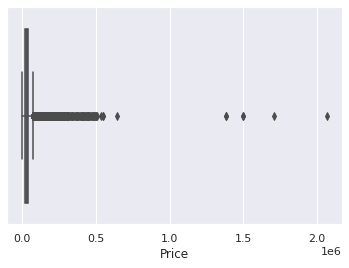

In [ ]:
sns.boxplot(x=df['Price'])

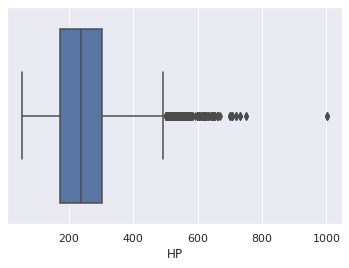

In [ ]:
sns.boxplot(x=df['HP'])

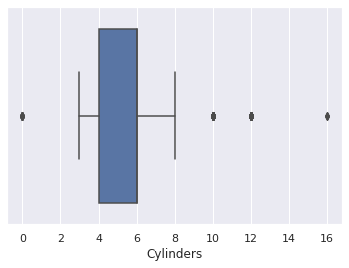

In [ ]:
sns.boxplot(x=df['Cylinders'])

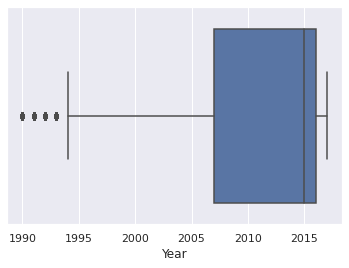

In [ ]:
sns.boxplot(x=df['Year'])

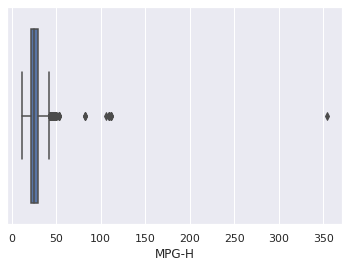

In [ ]:
sns.boxplot(x=df['MPG-H'])

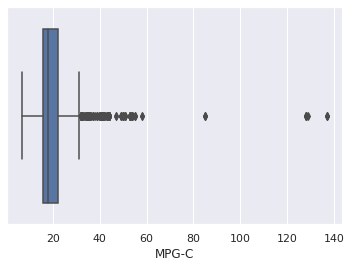

In [ ]:
sns.boxplot(x=df['MPG-C'])

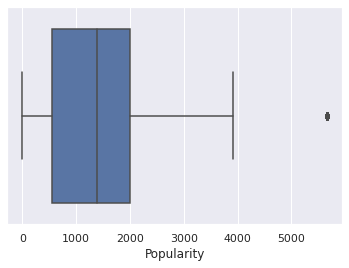

In [ ]:
sns.boxplot(x=df['Popularity'])

In [ ]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IER = Q3 - Q1
print(IER)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


Removing outliers

In [ ]:
df = df[~((df<(Q1-1.5 * IER))| (df>(Q3 + 1.5 * IER))).any(axis=1)]

In [ ]:
df.shape

(8546, 13)

Finding of the most represented car brands

In [ ]:
df['Make'].value_counts()

Chevrolet        1027
Toyota            569
Volkswagen        515
Nissan            513
GMC               469
Dodge             425
Mazda             378
Honda             373
Suzuki            339
Infiniti          322
Cadillac          300
Hyundai           242
Audi              240
Volvo             236
Acura             232
Subaru            220
BMW               218
Kia               216
Buick             184
Mitsubishi        179
Chrysler          173
Mercedes-Benz     170
Lexus             163
Pontiac           156
Lincoln           142
Saab              109
Oldsmobile        105
Land Rover         89
FIAT               59
Scion              55
Plymouth           43
Porsche            36
Lotus              20
HUMMER             17
Alfa Romeo          5
Maserati            4
Genesis             3
Name: Make, dtype: int64

In [ ]:
#-Percentage of car per brand
counts = df['Make'].value_counts()*100/sum( df['Make'].value_counts())
counts

Chevrolet        12.017318
Toyota            6.658086
Volkswagen        6.026211
Nissan            6.002808
GMC               5.487948
Dodge             4.973087
Mazda             4.423122
Honda             4.364615
Suzuki            3.966768
Infiniti          3.767845
Cadillac          3.510414
Hyundai           2.831734
Audi              2.808331
Volvo             2.761526
Acura             2.714720
Subaru            2.574304
BMW               2.550901
Kia               2.527498
Buick             2.153054
Mitsubishi        2.094547
Chrysler          2.024339
Mercedes-Benz     1.989235
Lexus             1.907325
Pontiac           1.825415
Lincoln           1.661596
Saab              1.275451
Oldsmobile        1.228645
Land Rover        1.041423
FIAT              0.690381
Scion             0.643576
Plymouth          0.503159
Porsche           0.421250
Lotus             0.234028
HUMMER            0.198923
Alfa Romeo        0.058507
Maserati          0.046806
Genesis           0.035104
N

[]

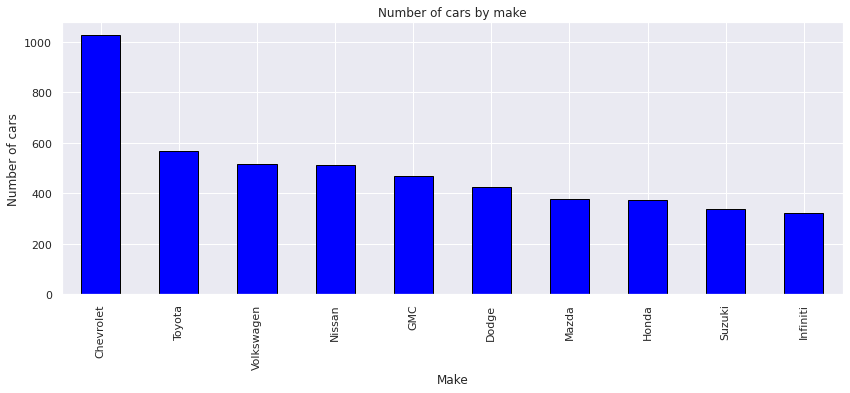

In [ ]:
#Plotting of 10 top car brands(to find the total number of cars sold for each brand.)

df.Make.value_counts().nlargest(10).plot(kind='bar', figsize=(14,5), color='blue', edgecolor='black')
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');
plt.plot()

From the above bar plot graph we can conclude that the car brand 'Chevrolet' is the most represented graph , which is followed by Toyota, Volswagen, Nissan , GMC and so on.

In [ ]:
#Finding the average price of top 10 car brands
prices = df[['Make', 'Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Mazda')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Suzuki')].groupby('Make').mean()


In [ ]:
#Displaying the average price of each brand
prices

,Price
Make,
Chevrolet,28142.855891
Dodge,26076.722353
GMC,33261.400853
Honda,27381.364611
Mazda,20495.820106
Nissan,28352.543860
Suzuki,18168.241888
Toyota,27769.421793
Volkswagen,29032.817476


(7) Plotting of the correlation matrix

In [ ]:
#Creating a correlation matrix
corr_matrix = df.corr()
#Printing of correlation matrix
corr_matrix

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
Price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


A correlation matrix is a table showing correlation coefficients between sets of variables. A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

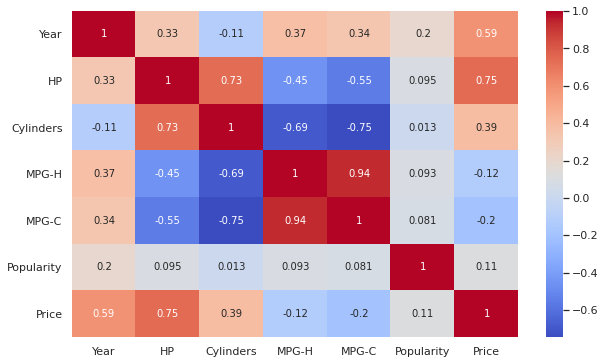

In [ ]:
#Visual representation of the correlation matrix using heatmap


plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


Following are the insights that can be taken from the above correlation matrix-


*   Both MPG-H and MPG-C are highly correlated among themselves
*   HP is highly correlated with Price and Cylinders (Positive correlation). While HP is negatively correlated with both MPG-C and MPG-H.Higher the value of HP, lower will be the values of MPG-C and MPG-H.
*   Cylinders is moderate to highly correlated with Price while negatively correlated with MPG-H and MPG-C.
*   The diagonal of the table is always a set of ones, because the correlation between a variable and itself is always 1.





(8) Performing of EDA and plotting of different graphs

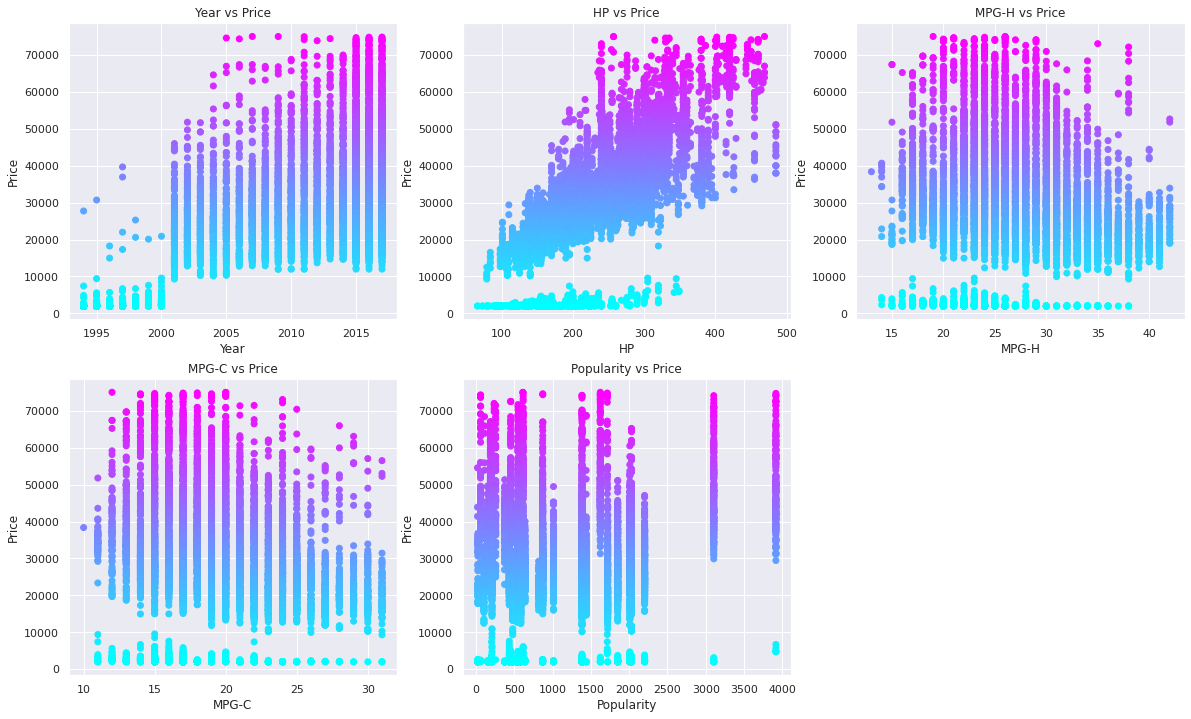

In [ ]:
#Plotting of scatter plots of each variable/column of dataset against Price
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
plt.title("Year vs Price")
plt.scatter(df["Year"], df["Price"],c=df['Price'], cmap='cool')
plt.xlabel("Year")
plt.ylabel("Price")

plt.subplot(2,3,2)
plt.title("HP vs Price")
plt.scatter(df["HP"], df["Price"],c=df['Price'], cmap='cool')
plt.xlabel("HP")
plt.ylabel("Price")

plt.subplot(2,3,3)
plt.title("MPG-H vs Price")
plt.scatter(df["MPG-H"], df["Price"],c=df['Price'], cmap='cool')
plt.xlabel("MPG-H")
plt.ylabel("Price")

plt.subplot(2,3,4)
plt.title("MPG-C vs Price")
plt.scatter(df["MPG-C"], df["Price"],c=df['Price'], cmap='cool')
plt.xlabel("MPG-C")
plt.ylabel("Price")

plt.subplot(2,3,5)
plt.title("Popularity vs Price")
plt.scatter(df["Popularity"], df["Price"],c=df['Price'], cmap='cool')
plt.xlabel("Popularity")
plt.ylabel("Price")

plt.show()

From the above subplots it is found that HP is the most highly correlated with Price

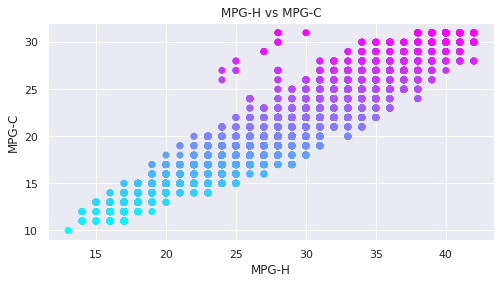

In [ ]:
#plotting the scatter plot between MPG-H and MPG-C
plt.figure(figsize=(8,4))
plt.title("MPG-H vs MPG-C")
plt.scatter(df["MPG-H"], df['MPG-C'],c=df['MPG-C'], cmap='cool')
plt.xlabel("MPG-H")
plt.ylabel("MPG-C")
plt.show()

From the above scatter plot it is found that MPG-C and MPG-H are strongly correlated .Therefore, they have a high correlation value in the correlation matrix.

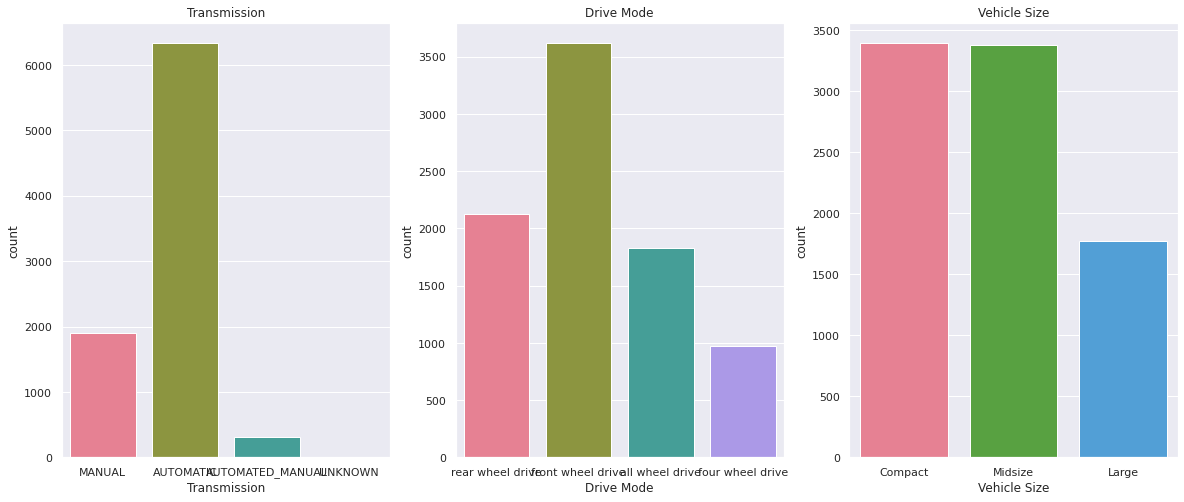

In [ ]:
#Plotting of graphs wrt Transmission , DriverMode and Vehicle Size
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.title("Transmission")
sns.countplot(x="Transmission", data=df, palette='husl')

plt.subplot(1,3,2)
plt.title("Drive Mode")
sns.countplot(x="Drive Mode", data=df, palette='husl')

plt.subplot(1,3,3)
plt.title("Vehicle Size")
sns.countplot(x="Vehicle Size", data=df, palette='husl')
plt.show()

From the above countplots we can conclude-



 

*   Car brand with transmission type - automatic is the highest selling one , followed by manual type and then automated manual.
*  Car brand with drive mode - front wheel drive is the highest selling one, followed by rear wheel drive , all wheel drive and lastly four wheel drive.
*   Car brand with vehicle size -compact or midsize vehicle size is the highest selling one compared to large size vehicle.










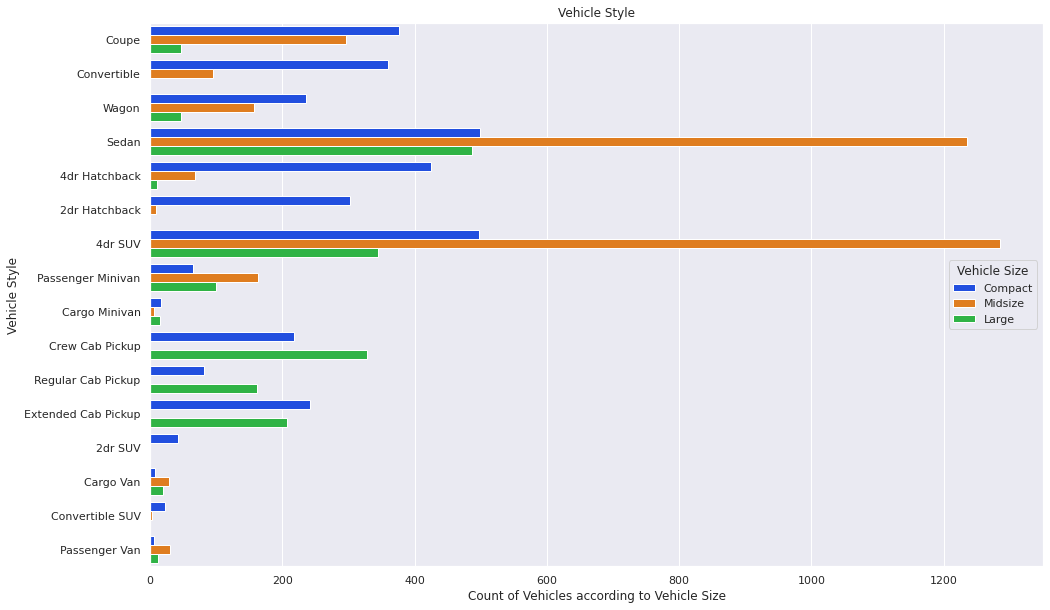

In [ ]:
plt.figure(figsize=(16,10))
plt.title("Vehicle Style")
sns.countplot(y="Vehicle Style", data=df ,hue='Vehicle Size', palette='bright')
plt.xlabel('Count of Vehicles according to Vehicle Size')
plt.ylabel('Vehicle Style')
plt.show()

From the above countplot we can conclude that-
*  Vehicle style- Sedan and 4dr SUV of midsize are the highest selling car brand
*  Vehicle style- Cargo Minivan, Cargo Van, Convertible SUV and Passenger SUV are the lowest selling car brands. 



(9) Splitting of the dataset and building a machine learning model with Price as the target variable

In [ ]:
X = df[['Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C','Popularity']].values
y = df['Price'].values

In [ ]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
standard_scalerX =  StandardScaler()
standard_scalerY =  StandardScaler()
X = standard_scalerX.fit_transform(X)
y = standard_scalerY.fit_transform(y.reshape(-1,1))

After proper scaling of the dataset we need to split it into two parts- train and test, where test set comprises of 20 percent of the whole dataset while the reamining 80 percent is used for training the algorithm.

In [ ]:
#Splitting the dataset into 80-20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)



Different algorithms are applied and performances are checked over metrics






Linear Regression Model

In [ ]:
#Applying on the train set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

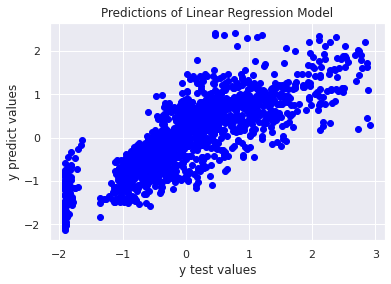

In [ ]:
#Applying on the test set
y_pred = model.predict(X_test)
plt.title('Predictions of Linear Regression Model')
plt.xlabel('y test values')
plt.ylabel('y predict values')
plt.scatter(y_test, y_pred,color='blue')
plt.show()

In [ ]:
#Evaluating the model using metrics
from sklearn import metrics
print('Mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

Mean absolute error:  0.4256788993790108
Root Mean Squared Error:  0.5578433473146853
R2 Score:  0.6800475541161141


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

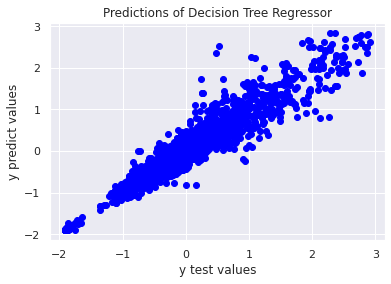

In [ ]:
y_pred = model.predict(X_test)
plt.title('Predictions of Decision Tree Regressor')
plt.xlabel('y test values')
plt.ylabel('y predict values')
plt.scatter(y_test, y_pred, color='blue')
plt.show()

In [ ]:
#Evaluating the model over metrics
print('Mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))


Mean absolute error:  0.19186661302160596
Root Mean Squared Error:  0.27960980235038524
R2 Score:  0.9196167237418312


Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
model =SVR(kernel ='rbf')
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

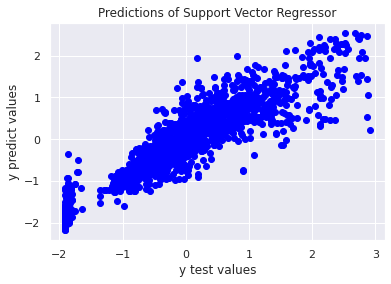

In [ ]:
y_pred = model.predict(X_test)
plt.title('Predictions of Support Vector Regressor')
plt.xlabel('y test values')
plt.ylabel('y predict values')
plt.scatter(y_test, y_pred, color='blue')
plt.show()

In [ ]:
#Evaluating the model over metrics
print('Mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))


Mean absolute error:  0.296336194165467
Root Mean Squared Error:  0.425273554512375
R2 Score:  0.8140493621762497


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 200, random_state = 0)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

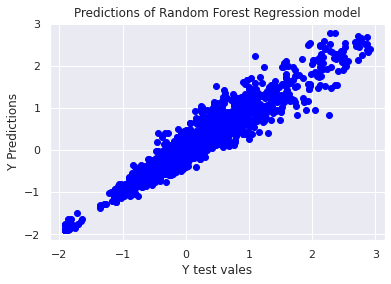

In [ ]:

y_pred = model.predict(X_test)
plt.title("Predictions of Random Forest Regression model")
plt.xlabel("Y test vales")
plt.ylabel("Y Predictions")
plt.scatter(y_test,y_pred, color='blue')
plt.show()

In [ ]:
#Evaluating the model over metrics
print('Mean absolute error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score: ', metrics.r2_score(y_test, y_pred))

Mean absolute error:  0.1777132080709762
Root Mean Squared Error:  0.24729436051917475
R2 Score:  0.9371233574910971
